In [1]:
import glob
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T

In [2]:
transform = T.Compose(
    [
     T.Resize((224, 224)),
     T.ToTensor()
    ]
)
net = torchvision.models.resnet18(pretrained=True) # pretrained on imagenet
for p in net.parameters():
    p.requires_grad = False

In [3]:
def get_saliency(net, image, transform):
    net.eval()
    image = Image.open(image).convert("RGB")
    image = transform(image).unsqueeze(0)
    image.requires_grad = True
    output = net(image)
    score, label = output.max(1) # max along label dim
    score.backward()
    slmp, _ = image.grad.squeeze(0).abs().max(0) # max along channel dim
    slmp = (slmp - slmp.min()) / (slmp.max() - slmp.min()) # normalizing
    image = image.squeeze(0).permute(1, 2, 0).detach()

    print(f"label: {label.item()}")
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.imshow(slmp, cmap=plt.cm.hot)
    plt.show()

label: 712


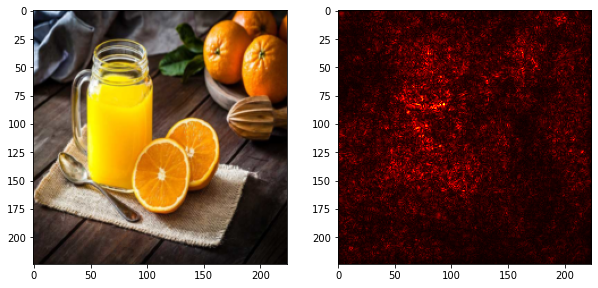

label: 257


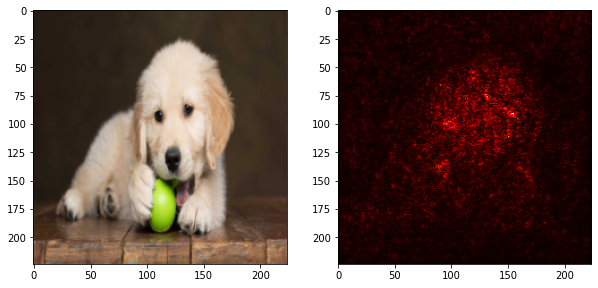

label: 154


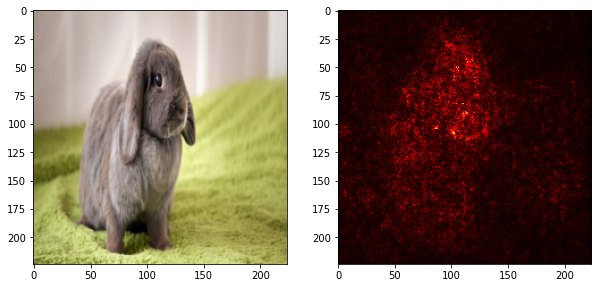

label: 998


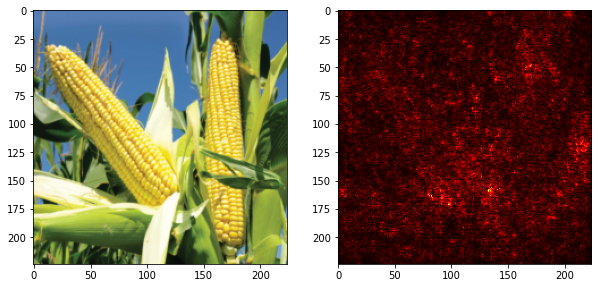

label: 968


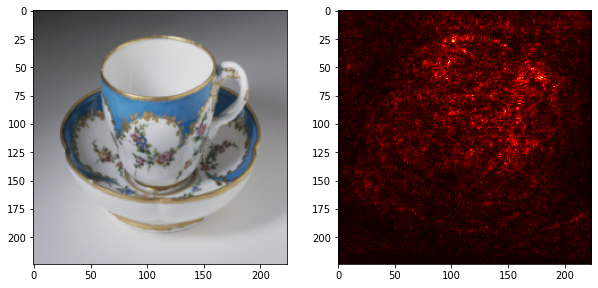

label: 549


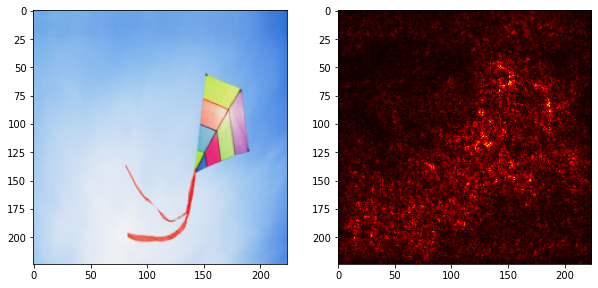

In [4]:
images = glob.glob("test_images/*.jpg")
for image in images:
    get_saliency(net, image, transform)